In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
import re
import string
import seaborn as sns
from wordcloud import WordCloud
import spacy
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
dataStack = pd.read_csv("/content/QueryResults.csv")
dataStack.head()

,title,body,tags
0,Custom_Vision_Prediction_3.0 REST API Giving 4...,<p>I am trying to call Custom Vision Predictio...,<azure><azure-cognitive-services><microsoft-cu...
1,Cant get the query for AzureDiagnostics to work,<p>I cant get this query to work. I got this q...,<azure><azure-log-analytics>
2,Would it possible to use all memory of GPUs wi...,<p>There is a <code>model</code> and two GPUs....,<python><gpu><pytorch>
3,Command not found while using sudo [UBUNTU 19.04],<p>When i try to run xampp server using the co...,<php><apache><ubuntu><xampp><lampp>
4,Get the prop and value of dynamically added in...,<p>There are two input fields in my form initi...,<react-native><redux><react-redux>


In [5]:
def getListTag(listToWork,sep,years="All"):
    """ 
    Fonction qui compte le nombre de mots différents
    listToWork : Dataframe
    sep : Séparateur pour spliter
    years : l'année pour laquelle on travaille
    """
    tagList=[]
    tempData = dataStack.copy()
    for tags in tempData[listToWork]:
        for mot in tags.split(sep):
            tagList.append(mot)
            
    dfTagList = pd.DataFrame(tagList, columns=["Tag"])
    dfTagList = dfTagList.groupby("Tag")\
        .agg(tagCount=pd.NamedAgg(column="Tag", aggfunc="count"))
    dfTagList.sort_values("tagCount", ascending=False, inplace=True)

    return dfTagList

In [6]:
def keep_info(listInfo,toKeep):
    """Return the list of information which is in the 'keep list'"""
    loc = []
    try:
        if listInfo != 'nan':
            for word in listInfo.split(','):
                if word in toKeep.index:
                    loc.append(word)
    except:
        print("Except ",listInfo)
    return ','.join(loc)

In [7]:
def nettoyageGe(listToClean):
    
    # Lower case
    locList = listToClean.lower()

    # Remove ponctuation sauf #
    locList = re.sub('[^\\w\\s#]', '', locList)
    # Remove digit
    locList = re.sub(r'\w*\d+\w*', '', locList)
    # Remove links
    locList = re.sub(r'http*\S+', '', locList)
    # Remove \n
    locList = locList.replace("\n"," ")
    # Change some words
    locList = locList.replace("i'm","i am")
    locList = locList.replace("i've","i have")
    locList = locList.replace("i'd","i would")
    locList = locList.replace("don't","do not")
    locList = locList.replace("that's","that is")
    # On supprime les espaces en trop
    locList=" ".join(locList.split())
    locList = locList.replace("c #","c#")
    locList = locList.replace("c#","cSharp")
    
    return(locList)

In [8]:
def getWord(listToWork):
    """ 
    Fonction qui compte le nombre de mots différents
    listToWork : Dataframe
    """
    motList=[]
    tempData = dataStack[listToWork].copy()
    
    for listData in tempData:
        for mot in listData:
            motList.append(mot)
            
    dfMotList = pd.DataFrame(motList, columns=["Mot"])
    dfMotList = dfMotList.groupby("Mot")\
        .agg(Count=pd.NamedAgg(column="Mot", aggfunc="count"))
    dfMotList.sort_values("Count", ascending=False, inplace=True)
    
    return dfMotList

Tags

In [10]:
dataStack['tags']=dataStack['tags'].str.replace("<","")
dataStack['tags']=dataStack['tags'].str.replace(">",",")
dataStack['tags']=dataStack['tags'].str[:-1]

In [11]:
dataStack

,title,body,tags
0,Custom_Vision_Prediction_3.0 REST API Giving 4...,<p>I am trying to call Custom Vision Predictio...,"azure,azure-cognitive-services,microsoft-custo..."
1,Cant get the query for AzureDiagnostics to work,<p>I cant get this query to work. I got this q...,"azure,azure-log-analytics"
2,Would it possible to use all memory of GPUs wi...,<p>There is a <code>model</code> and two GPUs....,"python,gpu,pytorch"
3,Command not found while using sudo [UBUNTU 19.04],<p>When i try to run xampp server using the co...,"php,apache,ubuntu,xampp,lampp"
4,Get the prop and value of dynamically added in...,<p>There are two input fields in my form initi...,"react-native,redux,react-redux"
...,...,...,...
49995,"Can GET, PUT and PATCH be replaced with POST H...","<p>POST , PUT, PATCH and GET are all different...","rest,http,restful-url"
49996,C++ vector of vector of abstract class,<p>for a simple chess game I want to create a ...,"c++,vector,2d-vector"
49997,I can not work with zeep in python - missing e...,<p>I want to make a payment gateway in django ...,"python,django"
49998,"Spring mvc encoding and ""???"" symbols instead ...",<p>I'm doing small Spring Mvc project in InteI...,"java,html,spring-mvc,encoding,utf-8"


In [13]:
listTags = getListTag('tags',',')
#listTags

In [14]:
#On garde les 40 plus utilisés
listTags=listTags.iloc[:40]
#listTags

<Figure size 1500x1000 with 0 Axes>

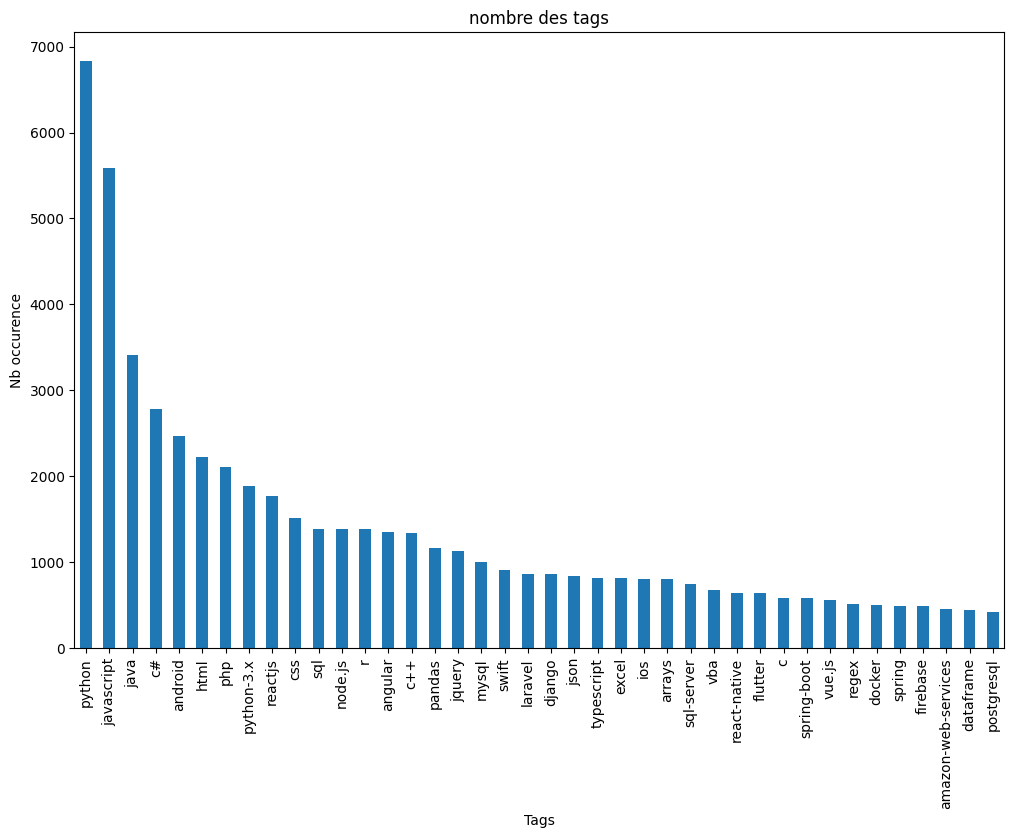

In [17]:
fig = plt.figure(figsize=(15, 10))

listTags.plot(figsize=(12,8), kind="bar",
          title="nombre des tags",
          ylabel="Nb occurence",
          xlabel="Tags",
          legend=False)
plt.xticks(np.arange(len(listTags)),listTags.index)
plt.show()

In [18]:
# keep top 40 tags
dataStack['tags']=dataStack['tags'].apply(lambda x : keep_info(x,listTags))

<ipython-input-18-225677922fb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataStack['tags']=dataStack['tags'].apply(lambda x : keep_info(x,listTags))


In [19]:
# On garde ceux qui ont des tags
dataStack=dataStack[dataStack['tags']!=""]

In [20]:
dataStack['tags']= dataStack['tags'].str.replace(',',' ')

In [22]:
dataStack['tags'].head()

2                 python
3                    php
4           react-native
5    javascript java css
6                 python
Name: tags, dtype: object

In [24]:
# Tokenization
dataStack['tags'] = dataStack['tags'].apply(nltk.tokenize.word_tokenize)

Title

In [25]:
dataStack['title'] = dataStack['title'].progress_apply(lambda x : nettoyageGe(x))

100%|██████████| 38019/38019 [00:00<00:00, 87842.81it/s]


In [33]:
dataStack

,title,body,tags
2,memory gpus model,<p>There is a <code>model</code> and two GPUs....,[python]
3,ubuntu,<p>When i try to run xampp server using the co...,[php]
4,prop value inputs redux react,<p>There are two input fields in my form initi...,[react-native]
5,css js web application servlet,"<p><a href=""https://i.stack.imgur.com/k3Vr3.pn...","[javascript, java, css]"
6,factors analysis array dataframe,<p>when doing the factor analysis with <code>f...,[python]
...,...,...,...
49992,android information,"<p>I have an <code>Galaxy S8 Android 9</code>,...",[android]
49994,text string javascript,<p>I am trying to get text from an array excep...,[javascript]
49996,c vector vector class,<p>for a simple chess game I want to create a ...,[c++]
49997,zeep python element error,<p>I want to make a payment gateway in django ...,"[python, django]"


In [27]:
dataStack['title'].head()

2    would it possible to use all memory of gpus wi...
3            command not found while using sudo ubuntu
4    get the prop and value of dynamically added in...
5    rendering css and js in a java web application...
6    how to map the factors analysis result from ar...
Name: title, dtype: object

In [28]:
dataStack['title'].head(20)

2     would it possible to use all memory of gpus wi...
3             command not found while using sudo ubuntu
4     get the prop and value of dynamically added in...
5     rendering css and js in a java web application...
6     how to map the factors analysis result from ar...
7        how to output all members of my list correctly
9     count of value of a field not for other values...
10          python read csv from bucket with import csv
11    code looping through the column but doesnt add...
12    how to get generic type of list or if it is im...
13    how to pass props of redirect in enzyme test case
14    react component and css style items in the sam...
16    its possible we can use external css file afte...
18      dynamic link behaviour with no deep link mapped
19    how to convert from a listcomprehension with b...
20    __nscfstring unrecognized selector sent to ins...
22    how do i return in a function two different li...
23    a windows version image is incompatible wi

In [29]:
nlp = spacy.load('en_core_web_sm')
pos_list = ["NOUN","PROPN"]

In [30]:
# On garde nom et prono
def keepNomEtPronom(info):
    doc = nlp(info)
    list_text_row = []
    for token in doc:
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    list_text = " ".join(list_text_row)
    list_text = list_text.replace("c #", "c#")
    list_text_row = []
    return list_text

In [32]:
dataStack['title'] = dataStack['title'].progress_apply(lambda x : keepNomEtPronom(x))

100%|██████████| 38019/38019 [03:35<00:00, 176.18it/s]


In [34]:
dataStack['title'].head(20)

2                                     memory gpus model
3                                                ubuntu
4                         prop value inputs redux react
5                        css js web application servlet
6                      factors analysis array dataframe
7                                          members list
9              count value field values query case stmt
10                         python csv bucket import csv
11                             code column result table
12                                       type list task
13                             props redirect test case
14                        component style items element
16                                         css file npm
18                                  link behaviour link
19    listcomprehension forin ifin code loops condit...
20                                    selector instance
22                                       function lists
23                           windows version ima

In [35]:
# Tokenization
dataStack['title'] = dataStack['title'].apply(nltk.tokenize.word_tokenize)

In [36]:
dataStack['title'].head(20)

2                                 [memory, gpus, model]
3                                              [ubuntu]
4                   [prop, value, inputs, redux, react]
5                  [css, js, web, application, servlet]
6                 [factors, analysis, array, dataframe]
7                                       [members, list]
9      [count, value, field, values, query, case, stmt]
10                   [python, csv, bucket, import, csv]
11                        [code, column, result, table]
12                                   [type, list, task]
13                        [props, redirect, test, case]
14                   [component, style, items, element]
16                                     [css, file, npm]
18                              [link, behaviour, link]
19    [listcomprehension, forin, ifin, code, loops, ...
20                                 [selector, instance]
22                                    [function, lists]
23                      [windows, version, image

In [38]:
import nltk
nltk.download('wordnet')
# Lemmatization
wn = nltk.WordNetLemmatizer()
dataStack['title'] = dataStack['title'].apply(lambda x : [wn.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [39]:
dataStack['title'].head(20)

2                                 [memory, gpus, model]
3                                              [ubuntu]
4                    [prop, value, input, redux, react]
5                    [cs, j, web, application, servlet]
6                  [factor, analysis, array, dataframe]
7                                        [member, list]
9       [count, value, field, value, query, case, stmt]
10                   [python, csv, bucket, import, csv]
11                        [code, column, result, table]
12                                   [type, list, task]
13                         [prop, redirect, test, case]
14                    [component, style, item, element]
16                                      [cs, file, npm]
18                              [link, behaviour, link]
19    [listcomprehension, forin, ifin, code, loop, c...
20                                 [selector, instance]
22                                     [function, list]
23                       [window, version, image

In [40]:
# StopWords
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))

dataStack['title'] = dataStack['title'].apply(lambda x : [mot for mot in x
                       if mot not in sw])

In [41]:
listTitle = getWord('title')

Body

In [42]:
# Supprimer les tag <code>
def SuppCode(x):
    soup = BeautifulSoup(x,"html.parser")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)

In [43]:
# Regrouper c et #
def RegCSharp(x):
    test = x.copy()
    while '#' in test : 
        idx = test.index('#')
        if(test[idx-1]=='c'):
            test[idx]="c#"
            del(test[idx-1])
        else:
            del(test[idx])
    return(test)

In [44]:
# Delete htlm et code tags
dataStack['body'] = dataStack['body'].apply(SuppCode)
# Delete all html tags
dataStack['body'] = [BeautifulSoup(text,"html.parser").get_text() for text in dataStack['body']]

#Nettoyage général
dataStack['body'] = dataStack['body'].progress_apply(lambda x : nettoyageGe(x))

100%|██████████| 38019/38019 [00:03<00:00, 10616.90it/s]


In [45]:
dataStack['body'] = dataStack['body'].progress_apply(lambda x : keepNomEtPronom(x))
print(dataStack['body'].head())
# Tokenization
dataStack['body'] = dataStack['body'].apply(nltk.tokenize.word_tokenize)
print(dataStack['body'].head())


100%|██████████| 38019/38019 [09:24<00:00, 67.34it/s]


2    gpus gpu image memory error memory image thing...
3            xampp server command xampp command result
4    input fields form button fields redux difficul...
5    project structure intellij idea java web appli...
6    factor analysis lib result array number variab...
Name: body, dtype: object
2    [gpus, gpu, image, memory, error, memory, imag...
3     [xampp, server, command, xampp, command, result]
4    [input, fields, form, button, fields, redux, d...
5    [project, structure, intellij, idea, java, web...
6    [factor, analysis, lib, result, array, number,...
Name: body, dtype: object


In [46]:
dataStack['body']=dataStack['body'].apply(lambda x : RegCSharp(x))
print(dataStack['body'].head())

2    [gpus, gpu, image, memory, error, memory, imag...
3     [xampp, server, command, xampp, command, result]
4    [input, fields, form, button, fields, redux, d...
5    [project, structure, intellij, idea, java, web...
6    [factor, analysis, lib, result, array, number,...
Name: body, dtype: object


In [47]:
# Lemmatizer
wn = nltk.WordNetLemmatizer()
dataStack['body'] = dataStack['body'].apply(lambda x : [wn.lemmatize(word) for word in x])
print(dataStack['body'].head())

2    [gpus, gpu, image, memory, error, memory, imag...
3     [xampp, server, command, xampp, command, result]
4    [input, field, form, button, field, redux, dif...
5    [project, structure, intellij, idea, java, web...
6    [factor, analysis, lib, result, array, number,...
Name: body, dtype: object


In [48]:
# StopWords
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))

dataStack['body'] = dataStack['body'].apply(lambda x : [mot for mot in x
                       if mot not in sw])

In [49]:
print(dataStack['body'].head())

2    [gpus, gpu, image, memory, error, memory, imag...
3     [xampp, server, command, xampp, command, result]
4    [input, field, form, button, field, redux, dif...
5    [project, structure, intellij, idea, java, web...
6    [factor, analysis, lib, result, array, number,...
Name: body, dtype: object


In [50]:
listBody = getWord('body')
listBody

,Count
Mot,
code,21763
error,14867
file,14416
data,12487
value,11446
...,...
lutron,1
lurker,1
lunix,1


In [51]:
listBodyTest = getWord('body')
print(dataStack['body'].head())

2    [gpus, gpu, image, memory, error, memory, imag...
3     [xampp, server, command, xampp, command, result]
4    [input, field, form, button, field, redux, dif...
5    [project, structure, intellij, idea, java, web...
6    [factor, analysis, lib, result, array, number,...
Name: body, dtype: object


In [53]:
dataStack

,title,body,tags
2,"[memory, gpus, model]","[gpus, gpu, image, memory, error, memory, imag...",[python]
3,[ubuntu],"[xampp, server, command, xampp, command, result]",[php]
4,"[prop, value, input, redux, react]","[input, field, form, button, field, redux, dif...",[react-native]
5,"[cs, j, web, application, servlet]","[project, structure, intellij, idea, java, web...","[javascript, java, css]"
6,"[factor, analysis, array, dataframe]","[factor, analysis, lib, result, array, number,...",[python]
...,...,...,...
49992,"[android, information]","[device, proxy, select, wifi, option, proxy, p...",[android]
49994,"[text, string, javascript]","[text, array, yearmonthdate, javascripti]",[javascript]
49996,"[c, vector, vector, class]","[chess, game, vector, vector, chess, piece, cl...",[c++]
49997,"[zeep, python, element, error]","[payment, gateway, django, zeep, module, payme...","[python, django]"


In [52]:
dataStack.to_csv("QueryResults_Clear.csv",index=False)